### Pandas 객체(자료구조)
- 1차원 : 시리즈(Series)
- 2차원 : 데이터프레임(DataFrame)

In [1]:
# pandas 모듈을 불러와서 pd라는 별칭으로 사용하겠다.
import pandas as pd

In [2]:
# 1차원 시리즈 생성
# list를 사용하여 Series 생성
# 도시별 인구수 나타내는 Series 생성
pop = pd.Series([9602000, 3344000, 1488000, 2419000])
pop

0    9602000
1    3344000
2    1488000
3    2419000
dtype: int64

In [3]:
# 시리즈 데이터에 인덱스를 지정하기
pop = pd.Series([9602000, 3344000, 1488000, 2419000],
          index = ['서울', '부산', '광주', '대구'])
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
dtype: int64

In [4]:
# 딕셔너리를 이용해서 시리즈 생성해보기
# 면적에 대한 정보
area = pd.Series({'서울' : 605.2, '부산' : 770.1 , '광주' : 501.1, '대구' : 883.5})
area

서울    605.2
부산    770.1
광주    501.1
대구    883.5
dtype: float64

- 데이터 속성 확인

In [5]:
# 1. value값만 확인하고 싶을때
pop.values   # 출력결과의 형태 : Numpy 배열

array([9602000, 3344000, 1488000, 2419000], dtype=int64)

In [6]:
# 2. 시리즈의 인덱스 값을 확인하고 싶을 때
pop.index # dtype = object ==> 문자열 자료형

Index(['서울', '부산', '광주', '대구'], dtype='object')

In [7]:
# 3. 시리즈의 데이터 타입 확인
pop.dtype
area.dtype

dtype('float64')

#### 시리즈 이름 지정
- 시리즈의 이름은 DataFrame의 컬럼명이 된다

In [8]:
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
dtype: int64

In [9]:
pop.name = '2020 인구'
pop

서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [10]:
pop.index.name = '도시'
pop

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

#### 시리즈 데이터 갱신(수정), 삭제, 추가

In [11]:
# 갱신(수정)
# 1. 인덱스 위치 접근
# 2. 값을 대입
pop.index.name = '지역'
pop

지역
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [12]:
# 부산 데이터를 3500000으로 수정
pop['부산'] = 3500000
pop

지역
서울    9602000
부산    3500000
광주    1488000
대구    2419000
Name: 2020 인구, dtype: int64

In [13]:
# 삭제 : drop()
# 광주 도시 삭제
pop.drop('광주')  # 데이터를 삭제하고 초기화를 시켜주지 않음.

# inplace : 데이터를 삭제하고 원래 위치에 반영(초기화)
pop.drop('광주', inplace=True) # 초기화
# ==> pop = pop.drop('광주')와 같다


In [14]:
pop

지역
서울    9602000
부산    3500000
대구    2419000
Name: 2020 인구, dtype: int64

In [15]:
# 추가 : 없는 키 값을 불러주고 값을 대입
# '거제' : 250000
pop['거제'] = 250000
pop

지역
서울    9602000
부산    3500000
대구    2419000
거제     250000
Name: 2020 인구, dtype: int64

In [16]:
# 인덱스 이름 변경 : 지역 ==> 도시
pop.index.name = '도시'

# 천안 데이터 추가 ==> '천안' : 660000
pop['천안'] = 660000

# 부산 데이터 수정
pop['부산'] = 3344000

pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [17]:
# 인덱스 이름 설정
area.index.name = '도시'

# 시리즈 이름 설정
area.name = '면적(㎢)'

# 데이터 수정(광주 -> 거제), 천안 추가
area['거제'] = 501.1
area['천안'] = 450.1

area

도시
서울    605.2
부산    770.1
광주    501.1
대구    883.5
거제    501.1
천안    450.1
Name: 면적(㎢), dtype: float64

### 시리즈 병합(concat)
- 1차원을 연결하여 2차원으로 변환
- 시리지의 이름이 데이터프레임의 컬럼명이 되는지 확인

In [18]:
# axis = 0 : 행방향(수직방향)
# axis = 1 : 열방향(수평방향)
df = pd.concat([pop, area]) # axis 기본값 ==> 행방향
df2 = pd.concat([pop, area], axis=1)

display(df)
display(df2)



도시
서울    9602000.0
부산    3344000.0
대구    2419000.0
거제     250000.0
천안     660000.0
서울        605.2
부산        770.1
광주        501.1
대구        883.5
거제        501.1
천안        450.1
dtype: float64

,2020 인구,면적(㎢)
도시,,
서울,9602000.0,605.2
부산,3344000.0,770.1
대구,2419000.0,883.5
거제,250000.0,501.1
천안,660000.0,450.1
광주,NaN,501.1


#### 2차원 데이터프레임 생성
- 리스트, 딕셔너리 자료를 활용하여 생성 가능

In [19]:
# 딕셔너리를 이용하여 데이터프레임 생성하기
data = {'2020 인구' : [9602000, 3344000, 2419000], '면적(㎢)' : [605.2, 770.1, 883.5]} # 키값이 컬럼명
data
df3 = pd.DataFrame(data, index = ['서울', '부산', '대구'])
df3

,2020 인구,면적(㎢)
서울,9602000,605.2
부산,3344000,770.1
대구,2419000,883.5


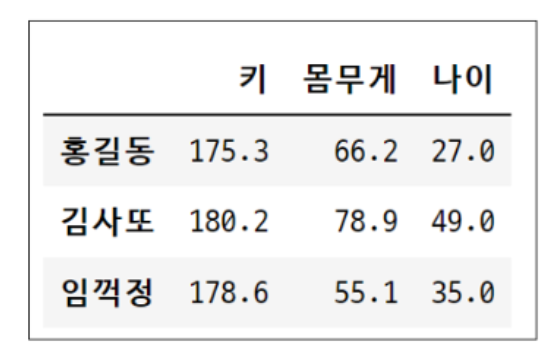

In [20]:
data4 = {'키' : [175.3, 180.2, 178.6],
        '몸무게' : [66.2, 78.9, 55.1],
        '나이' : [27.0, 49.0, 35.0]}
df4 = pd.DataFrame(data4, index= ['홍길동', '김사또', '임꺽정'])
df4

,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


### Pandas 데이터 접근하기 : 인덱싱 & 슬라이싱
#### 시리즈 인덱싱

In [21]:
pop
# 인덱싱으로 거제 데이터 접근
pop[3]

250000

In [22]:
# 여러개 도시 데이터를 한번에 인덱싱하기
pop
pop[['서울','대구','천안']]
pop[[0,2,4]]

도시
서울    9602000
대구    2419000
천안     660000
Name: 2020 인구, dtype: int64

#### 시리즈 슬라이싱

In [23]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [24]:
# 부산 ~ 천안 접근해보기
pop[1:]

도시
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

#### 시리즈 불리언 인덱싱

In [25]:
pop

도시
서울    9602000
부산    3344000
대구    2419000
거제     250000
천안     660000
Name: 2020 인구, dtype: int64

In [26]:
# 인구수가 1000000 미만인 도시 확인하기
pop < 1000000
pop[pop<1000000]

도시
거제    250000
천안    660000
Name: 2020 인구, dtype: int64

In [27]:
# 백만 미만인 도시명만 확인하고 싶을 때
pop[pop<1000000].index

Index(['거제', '천안'], dtype='object', name='도시')

In [28]:
# 인구수가 2백만 이상 ~ 5백만 이하인 도시 확인하기
display(pop[(pop>=2000000) & (pop <= 5000000)])
pop[(pop>=2000000) & (pop <= 5000000)].index

도시
부산    3344000
대구    2419000
Name: 2020 인구, dtype: int64

Index(['부산', '대구'], dtype='object', name='도시')

#### DataFrame 열 인덱싱

In [29]:
# 2명 학생에 대한 성적 데이터 프레임 생성
df_stu = pd.DataFrame({'java':[95, 85], 'python':[100,95],
                       'db':[85,85], 'html/css':[70,75],},
                        index = ['dw','eh'])
df_stu

,java,python,db,html/css
dw,95,100,85,70
eh,85,95,85,75


In [30]:
# 'python' 과목 성적 데이터 접근
df_stu['python']

dw    100
eh     95
Name: python, dtype: int64

In [31]:
df_stu[['python']]

,python
dw,100
eh,95


In [32]:
# 여러개의 컬럼에 접근하기
df_stu[['python', 'db']]

,python,db
dw,100,85
eh,95,85


In [33]:
# df[:] => 행 인덱싱
df_stu['java' : 'python']
df_stu['dw':'eh']
df_stu[1:]

,java,python,db,html/css
eh,85,95,85,75


#### 행과 열에 접근하는 인덱서
- df[]  ==> 컬럼인덱싱  
- df[:] ==> 행인덱싱  
  ====> 불편
- loc, iloc 인덱서 등장
- df.loc[행], df.loc[행,열] , df.loc[행:행, [열1, 열3]]  
  ✔ 실제 인덱스명 또는 컬럼명을 사용하여 데이터 접근
- df.iloc[행], df.iloc[행,열]  
  ✔ numpy array 인덱스 값을 사용하여 데이터 접근

In [34]:
# dw 행 데이터 접근
# loc : 눈에 보이는 label 라벨 값
df_stu.loc[['dw']]

,java,python,db,html/css
dw,95,100,85,70


In [35]:
# iloc : 인덱스 값 데이터 접근
df_stu.iloc[[0]]


,java,python,db,html/css
dw,95,100,85,70


In [36]:
# df_stu dw, eh 행인덱싱
df_stu.iloc[:]

,java,python,db,html/css
dw,95,100,85,70
eh,85,95,85,75


In [37]:
# df_stu iloc 열 접근
# java 컬럼 접근해보기
df_stu.iloc[:,[0]]

# dw, java 점수 접근
df_stu.iloc[:1,[0]]

,java
dw,95


In [38]:
# df_stu dw의 python, html/css 점수에 접근해보기
df_stu.iloc[:1,[1,3]]

,python,html/css
dw,100,70


#### DataFrame 불리언 인덱싱
- 논리 연산자를 활용하여 데이터 접근

In [39]:
# 행 데이터 추가
df_stu.loc['dh'] = [95, 95, 85, 100]

In [40]:
# 컬럼 추가
# 1. 컬럼 접근(없는 이름) # 2. 대입
df_stu.loc[:,'ml'] = [100,100,100]
df_stu

,java,python,db,html/css,ml
dw,95,100,85,70,100
eh,85,95,85,75,100
dh,95,95,85,100,100


In [41]:
# java 성적에서 90 이상인 사람의 이름
# 1. java 컬럼 접근
# 2. 논리 연산자로 조건 질문 던지기
# 3. True, False -> data에 대입 (masking)
display(df_stu.loc[:,'java'] >= 90)
display(df_stu[df_stu['java']>=90])
df_stu[df_stu['java']>=90].index # 불리언 인덱싱이 행 인덱싱으로 작용

dw     True
eh    False
dh     True
Name: java, dtype: bool

,java,python,db,html/css,ml
dw,95,100,85,70,100
dh,95,95,85,100,100


Index(['dw', 'dh'], dtype='object')

In [42]:
# python 성적이 100점인 사람은 몇명인가?

display(len(df_stu[df_stu['python'] == 100].index))
display(df_stu[df_stu['python'] == 100].index.size)
result=df_stu[df_stu['python'] == 100].shape[0]
print(f'python 성적이 100점인 사람은 몇명인가? {result}')

1

1

python 성적이 100점인 사람은 몇명인가? 1


In [43]:
df_stu.iloc[0]==100

java        False
python       True
db          False
html/css    False
ml           True
Name: dw, dtype: bool

In [44]:

# df_stud[df_stu.iloc[0]==100] 
# ==> iloc 인덱서는 불리언 인덱싱과 호환이 안됨


### Pandas 유용한 함수

#### value_counts() : 값이 등장한 횟수 세는 기능

In [45]:
df_stu

,java,python,db,html/css,ml
dw,95,100,85,70,100
eh,85,95,85,75,100
dh,95,95,85,100,100


In [46]:
df_stu['java'].value_counts()

95    2
85    1
Name: java, dtype: int64

In [47]:
# python에서 가장 많이 나온 성적 개수는? (빈도수가 높은 성적은?)
df_stu['python'].value_counts()

95     2
100    1
Name: python, dtype: int64

In [48]:
# 빈도수 파악 -> 카테고리형식(범주형) 데이터에 자주 사용
# 기술통계량 파악 -> 값의 크고 작음의 의미가 있는 숫자데이터(수치형) 자주 사용

#### sort_values(), sort_index() : 정렬하는 함수

In [49]:
# value 값 기준 정렬, 기본값: 오름차순 정렬
pop.sort_values(ascending = False)

도시
서울    9602000
부산    3344000
대구    2419000
천안     660000
거제     250000
Name: 2020 인구, dtype: int64

In [50]:
pop.sort_index(ascending = False)

도시
천안     660000
서울    9602000
부산    3344000
대구    2419000
거제     250000
Name: 2020 인구, dtype: int64

#### drop() : 데이터를 삭제하는 함수
- 행 이름 삭제해줘, 컬럼 이름 삭제해줘
- axis = 0(행방향으로 데이터 확인), axis = 1(열방향으로 데이터 확인)

In [51]:
# 행 데이터 삭제
df_stu.drop('dh')

,java,python,db,html/css,ml
dw,95,100,85,70,100
eh,85,95,85,75,100


In [52]:
# 열 데이터 삭제
df_stu.drop('ml', axis=1, inplace = True)

In [53]:
df_stu

,java,python,db,html/css
dw,95,100,85,70
eh,85,95,85,75
dh,95,95,85,100


#### 데이터 불러오는 함수

In [58]:
# 한글 불러오는 encoding 방식 : utf-8, euc-kr, cp949
score = pd.read_csv('./data/score.csv', index_col = '과목', encoding= 'euc-kr')
# ==> 과목명을 인덱스로 사용하겠다
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [103]:
# 데이터 확인하기
display(score.values)

# 크기 확인
display(score.shape)

# 데이터 타입
# 데이터프레임의 데이터 타입 확인은 각각의 데이터로 접근해야 한다.
display(score.values.dtype)
display(score['1반'].dtype)

# 컬럼명(이름) 확인
display(score.columns)

# 행이름
display(score.index)


array([[  45.,   44.,   73.,   39.,  804.],
       [  76.,   92.,   45.,   69., 1128.],
       [  47.,   92.,   45.,   69., 1012.],
       [  92.,   81.,   85.,   40., 1192.],
       [  11.,   79.,   47.,   26.,  652.]])

(5, 5)

dtype('float64')

dtype('int64')

Index(['1반', '2반', '3반', '4반', '합계'], dtype='object')

Index(['수학', '영어', '국어', '사회', '과학'], dtype='object', name='과목')

####  데이터  정보 출력하는 함수

In [82]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 수학 to 과학
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1반      5 non-null      int64
 1   2반      5 non-null      int64
 2   3반      5 non-null      int64
 3   4반      5 non-null      int64
dtypes: int64(4)
memory usage: 372.0+ bytes


In [83]:
# 결측치 확인하는 함수 : isnull()
score.isnull()

,1반,2반,3반,4반
과목,,,,
수학,False,False,False,False
영어,False,False,False,False
국어,False,False,False,False
사회,False,False,False,False
과학,False,False,False,False


In [85]:
score.isnull().sum()

1반    0
2반    0
3반    0
4반    0
dtype: int64

#### 총합을 구하는 함수

In [87]:
score.isnull().sum(axis = 1) # ==> 열방향

1반    0
2반    0
3반    0
4반    0
dtype: int64

#### 학급별 순위( 성적이 높은 순부터)

In [93]:
# 여러개의 컬럼을 정렬하고 싶을 때
score.sum().sort_values(ascending=False)
# df.sort_values(by = ['컬럼명1', '컬럼명2'], ascending = [False,True])
# 컬럼명 1 : 내림차순, 컬럼명 2 : 오름차순
# by와 ascending에 입력할 원소의 갯수는 같아야 함.

2반    388
3반    295
1반    271
4반    243
dtype: int64

#### 과목별 합계를 계산하여 '합계' 컬럼으로 추가하기
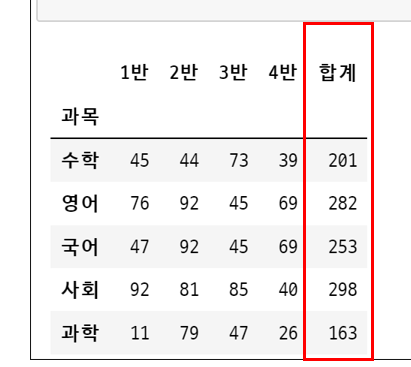

In [192]:
score_sum = score.sum(axis = 1)
score['합계'] = score_sum
score

,1반,2반,3반,4반,합계,평균
수학,45.0,44.0,73.0,39.0,452.25,50.25
영어,76.0,92.0,45.0,69.0,634.50,70.50
국어,47.0,92.0,45.0,69.0,569.25,63.25
사회,92.0,81.0,85.0,40.0,670.50,74.50
과학,11.0,79.0,47.0,26.0,366.75,40.75
반평균,54.2,77.6,59.0,48.6,538.65,59.85


#### 과목별 평균을 계산하여 '평균' 컬럼으로 추가하기
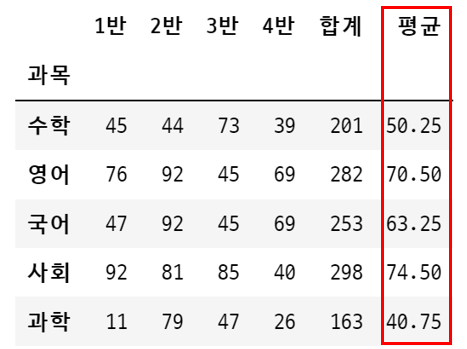

In [162]:
score_avg = score_sum/4
score['평균'] = score_avg

# 선생님 풀이
# score_avg = score['합계']/score.columns[:4].size
# s_avg = score['합계']/len(score.columns[:4])
# score['평균'] = s_avg

# 2번째 mean 이용
# score.loc[:,:'4반'].mean(axis = 1) ==> 열방향

In [191]:
score

,1반,2반,3반,4반,합계,평균
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


#### 각 반의 평균
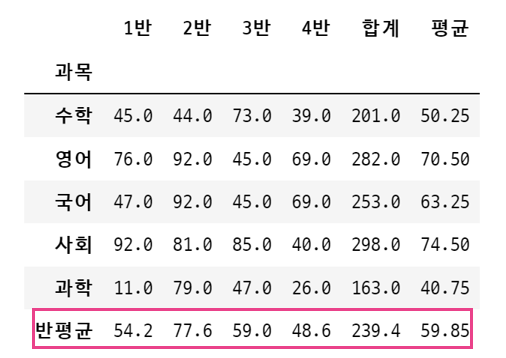

In [165]:
c_avg = score.mean()
score.loc['반평균'] = c_avg

In [166]:
score

,1반,2반,3반,4반,합계,평균
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


#### 최댓값, 최소값 구하는 함수
- max, min

In [171]:
# max() : 열방향 최댓값
display(score.max(axis = 1))

# min() : 행방향 최솟값
display(score.min())


수학     201.0
영어     282.0
국어     253.0
사회     298.0
과학     163.0
반평균    239.4
dtype: float64

1반     11.00
2반     44.00
3반     45.00
4반     26.00
합계    163.00
평균     40.75
dtype: float64

##### 1반부터 4반까지 점수 중 과목별 가장 큰 값과 작은 값의 차이를 구하세요.
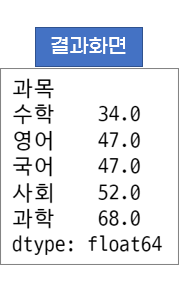


In [193]:
s_max = score.loc[:'과학',:'4반'].max(axis = 1)
s_min = score.loc[:'과학',:'4반'].min(axis = 1)
s_max - s_min


수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

#### cut 함수 : 수치형 데이터 ==> 범주형 데이터 변경

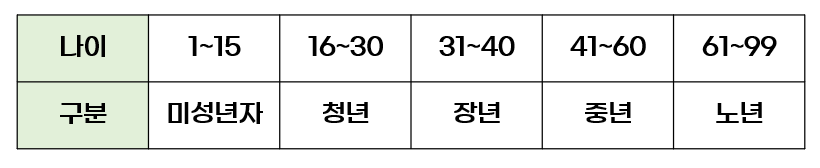

In [194]:
ages = [0,2,10,21,23,37,31,61,20,41,32,100]
bins = [-1, 15, 30, 40, 60, 100] # 구간 설정 , 시작값은 포함되지 않고 끝값은 포함됨
labels = ['미성년자', '청년', '장년', '중년', '노년']
cats = pd.cut(ages, bins = bins, labels = labels)
cats

['미성년자', '미성년자', '미성년자', '청년', '청년', ..., '노년', '청년', '중년', '장년', '노년']
Length: 12
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

In [197]:
pd.Series(cats)

0     미성년자
1     미성년자
2     미성년자
3       청년
4       청년
5       장년
6       장년
7       노년
8       청년
9       중년
10      장년
11      노년
dtype: category
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

#### groupby() : 데이터를 그룹별로 묶어 집계를 낼 수 있게 해주는 함수

In [198]:
s1 = pd.Series([1,0,1,0,1])
s2 = pd.Series(['female','female','male','male','female'])
s3 = pd.Series([1,2,3,4,5])

ti = pd.concat([s1,s2,s3], axis =1)
ti.columns = ['Servived', 'Sex', 'PassengerId']
ti

,Servived,Sex,PassengerId
0,1,female,1
1,0,female,2
2,1,male,3
3,0,male,4
4,1,female,5


In [205]:
# 성별에 따른 생존자 수 확인하기
ti[['Servived', 'Sex']].groupby('Sex').sum() # 성별을 기준으로 묶어서 결과를 반환

,Servived
Sex,
female,2
male,1


In [228]:
# 성별에 따른 생존자 수 / 사망자 수 확인하기
ti.groupby(by = ['Sex', 'Servived']).count()

PassengerId
Sex    Servived             
female 0                   1
       1                   2
male   0                   1
       1                   1

In [ ]:
# 판다스 공식 사이트 ( https://pandas.pydata.org )